In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
plt.style.use('Solarize_Light2')
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.metrics import AUC
from keras.optimizers import Adam
from data_generator import DataGenerator
from sklearn.model_selection import train_test_split

In [15]:
def plot_hist(hist, metric: str) -> Figure:
	fig, axs = plt.subplots(1, 2, figsize=(15, 6))
	axs[0].plot(hist.history['val_loss'], label="Validation")
	axs[0].plot(hist.history['loss'], label="Training")
	axs[0].set_xlabel('Epoch')
	axs[0].set_ylabel('Loss')
	axs[0].legend(labelcolor='linecolor')
	axs[1].plot(hist.epoch, hist.history['val_' + metric], label='Validation')
	axs[1].plot(hist.epoch, hist.history[metric], label='Training')
	axs[1].set_xlabel('Epoch')
	axs[1].set_ylabel(metric.capitalize())
	axs[1].set_xlim(left=0, right=hist.epoch[-1])
	baseline_acc = (np.bincount(y_train) / len(y_train)).max().round(3)
	axs[1].axhline(baseline_acc, ls='--', label='Train baseline', color='#002255', alpha=0.5)
	axs[1].legend(labelcolor='linecolor')
	return fig

In [3]:
df = pd.read_csv("../ionosphere.data", header=None)
df = df.drop(df.columns[[1, 34]], axis=1)
df_train, df_test = train_test_split(df, test_size=0.2)

In [4]:
X_train = df_train.iloc[:,1:].values
y_train = df_train.iloc[:,0].values

X_test = df_test.iloc[:,1:].values
y_test = df_test.iloc[:,0].values

In [5]:
data_gen_train = DataGenerator(X_train, y_train, 10, True)
data_gen_test = DataGenerator(X_test, y_test, 10, False)

In [6]:
print(len(data_gen_train), len(data_gen_test))
print(len(data_gen_train._y), len(data_gen_test._y))
print(np.bincount(data_gen_train._y), np.bincount(data_gen_test._y))

56 7
280 71
[ 29 251] [ 9 62]


In [7]:
model = Sequential(
    [
        Dense(10, activation="relu", name="layer1"),
        Dropout(0.4),
        Dense(10, activation="relu", name="layer2"),
        Dropout(0.4),
        Dense(1, activation="sigmoid", name="layer3"),
    ]
)
auc = AUC(curve="ROC", name="auc")
model.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=5e-4), metrics=[auc])

2022-06-24 17:14:10.501291: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
# hist = model.fit(X_train, y_train, validation_split=0.1, epochs = 200)
hist = model.fit(data_gen_train, validation_data=data_gen_test, epochs = 100)

Epoch 1/100
56/56 [==============================] - 1s 8ms/step - loss: 0.8031 - auc: 0.4352 - val_loss: 0.7204 - val_auc: 0.5729
Epoch 2/100
56/56 [==============================] - 0s 2ms/step - loss: 0.7446 - auc: 0.4876 - val_loss: 0.7039 - val_auc: 0.7022
Epoch 3/100
56/56 [==============================] - 0s 3ms/step - loss: 0.7197 - auc: 0.5245 - val_loss: 0.6877 - val_auc: 0.8124
Epoch 4/100
56/56 [==============================] - 0s 3ms/step - loss: 0.6884 - auc: 0.5869 - val_loss: 0.6784 - val_auc: 0.8324
Epoch 5/100
56/56 [==============================] - 0s 3ms/step - loss: 0.6648 - auc: 0.6213 - val_loss: 0.6695 - val_auc: 0.8406
Epoch 6/100
56/56 [==============================] - 0s 5ms/step - loss: 0.6633 - auc: 0.6138 - val_loss: 0.6648 - val_auc: 0.8488
Epoch 7/100
56/56 [==============================] - 0s 3ms/step - loss: 0.6874 - auc: 0.6033 - val_loss: 0.6447 - val_auc: 0.8506
Epoch 8/100
56/56 [==============================] - 0s 2ms/step - loss: 0.6287 - a

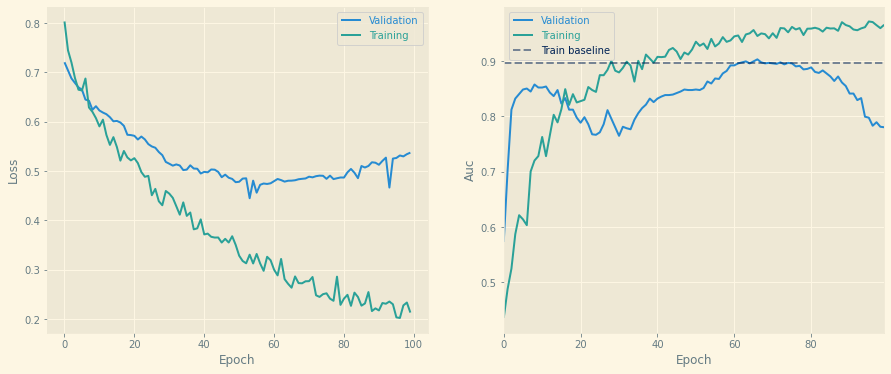

In [11]:
fig = plot_hist(hist, "auc")

In [13]:
fig.savefig("./example.png")

### circular slicing

In [ ]:
def cirular_slicing(arr: np.ndarray, start: int, size: int):
	l = len(arr)
	start = start % l
	if size > l:
		raise ValueError("maybe consider smaller size.")
	if start + size > l:
		return np.append(arr[start:], arr[:(start+size-l)])
	else:
		return arr[start:(start+size)]

In [ ]:
cirular_slicing(np.arange(5), 0, 3)